In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from bokeh.plotting import figure, output_file, show, gridplot
from bokeh.models import NumeralTickFormatter
from bokeh.io import output_notebook

In [3]:
output_notebook()

Loading BokehJS ...

In [4]:
%%bash

head -19 ../data/cyclic_punish_data/run-3-average.dat
head -19 ../data/cyclic_punish_data/run-3-dominant.dat
head -19 ../data/cyclic_punish_data/run-3-count.dat
head -33 ../data/cyclic_punish_data/run-3-instruction.dat
head -8 ../data/cyclic_punish_data/run-3-resource.dat
head -14 ../data/cyclic_punish_data/run-3-cur_reactions.dat

# Avida Average Data
# Fri Feb  3 12:55:35 2017
#  1: Update
#  2: Merit
#  3: Gestation Time
#  4: Fitness
#  5: Repro Rate?
#  6: Size
#  7: Copied Size
#  8: Executed Size
#  9: Abundance
# 10: Proportion of organisms that gave birth in this update
# 11: Proportion of Breed True Organisms
# 12: Genotype Depth
# 13: Generation
# 14: Neutral Metric
# 15: Lineage Label
# 16: True Replication Rate (based on births/update, time-averaged)

# Avida Dominant Data
# Wed Feb  1 16:44:16 2017
#  1: Update
#  2: Average Merit of the Dominant Genotype
#  3: Average Gestation Time of the Dominant Genotype
#  4: Average Fitness of the Dominant Genotype
#  5: Repro Rate?
#  6: Size of Dominant Genotype
#  7: Copied Size of Dominant Genotype
#  8: Executed Size of Dominant Genotype
#  9: Abundance of Dominant Genotype
# 10: Number of Births
# 11: Number of Dominant Breed True?
# 12: Dominant Gene Depth
# 13: Dominant Breed In
# 14: Max Fitness?
# 15: Genotype ID of Dominant Genotype
# 16: Name of th

In [5]:
def merge_reps(path, file, columns, col, skiprows=None):

    df_1 = pd.read_csv("../data/%s/run-1-%s.dat" %(path, file),
                       delimiter=' ', skiprows=skiprows, header=None)

    df_1.columns = columns
    df_1 = df_1.dropna(axis=1)

    merge_reps = df_1[['update',col]].copy()
    merge_reps.columns = ["update",col+"_1"]

    for i in range(2,51):
        
        try:
            df = pd.read_csv("../data/%s/run-%s-%s.dat" %(path, i, file),
                             delimiter=' ', skiprows=skiprows, header=None)
        except FileNotFoundError:
            continue

        df.columns = columns
        df = df.dropna(axis=1)

        merge_reps[col+'_%s' %i] = df[col]
        
    return merge_reps

In [6]:
columns = ['update','merit','gestation_time','fitness','repro_rate',
           '(deprecated)_size','copied_size','executed_size',
           '(deprecated)_abundance','proportion_of_organisms_that_gave_birth_in_this_update',
           'proportion_of_breed_true_organisms','(deprecated)_genotype_depth',
           'generation','neutral_metric','lineage_label',
           'true_replication_rate_(based_on_births/update_time-averaged)','']

fitness_cyc = merge_reps(path='cyclic_zero_data', file='average',
                         columns=columns, col='fitness', skiprows=19)

fitness_cyc_not = merge_reps(path='cyclic_notzero_data', file='average',
                         columns=columns, col='fitness', skiprows=19)

fitness_pun = merge_reps(path='punish_value_data', file='average',
                         columns=columns, col='fitness', skiprows=19)

fitness_cp = merge_reps(path='cyclic_punish_data', file='average',
                         columns=columns, col='fitness', skiprows=19)

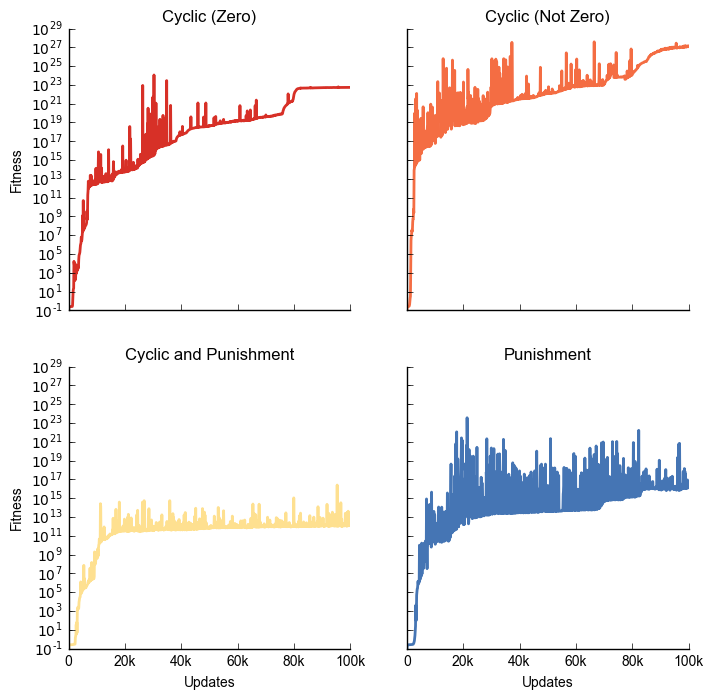

In [7]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row',
                                             figsize=(8,8), facecolor='white')

def clean_axes(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    
hfont = {'fontname':'Arial'}

##############

ax1.plot(fitness_cyc["update"],
         fitness_cyc.iloc[:,1:].mean(axis=1),
         color='#d73027', lw=2)

ax1.set_ylabel("Fitness", **hfont)

clean_axes(ax1)
ax1.set_title('Cyclic (Zero)', **hfont)

##############

ax2.plot(fitness_cyc_not["update"],
         fitness_cyc_not.iloc[:,1:].mean(axis=1),
         color='#f46d43', lw=2)

ax2.set_yscale('log')
ax2.set_ylim(10e-2, 10e28)

clean_axes(ax2)
ax2.set_title('Cyclic (Not Zero)', **hfont)

##############

ax3.plot(fitness_pun["update"],
         fitness_pun.iloc[:,1:].mean(axis=1),
         color='#fee090', lw=2)

ax3.set_xticklabels(['0','20k','40k','60k','80k','100k'], **hfont)
ax3.set_xlabel("Updates", **hfont)
ax3.set_ylabel("Fitness", **hfont)

clean_axes(ax3)
ax3.set_title('Cyclic and Punishment', **hfont)

##############

ax4.plot(fitness_cp["update"],
         fitness_cp.iloc[:,1:].mean(axis=1),
         color='#4575b4', lw=2)

ax4.set_yscale('log')
ax4.set_ylim(10e-2, 10e28)
ax4.set_xticklabels(['0','20k','40k','60k','80k','100k'], **hfont)
ax4.set_xlabel("Updates", **hfont)

clean_axes(ax4)
ax4.set_title('Punishment', **hfont)

#save figure
#fig.savefig('mean_fitness_per_env(n=50).pdf', format='pdf', bbox_inches='tight')

In [8]:
# create four plots
p1 = figure(title='Cyclic (Zero)', y_axis_type="log")

p1.line(fitness_cyc["update"],
        fitness_cyc.iloc[:,1:].mean(axis=1),
        color='#d73027', line_width=2)

p1.xaxis.major_label_text_alpha = 0
p1.yaxis.axis_label = "Fitness"

##############

p2 = figure(title='Cyclic (Not Zero)', y_axis_type="log",
            x_range=p1.x_range, y_range=p1.y_range)

p2.line(fitness_cyc_not["update"],
        fitness_cyc_not.iloc[:,1:].mean(axis=1),
        color='#f46d43', line_width=2)

p2.xaxis.major_label_text_alpha = 0
p2.yaxis.major_label_text_alpha = 0

##############

p3 = figure(title='Cyclic and Punishment', y_axis_type="log",
            x_range=p1.x_range, y_range=p1.y_range)

p3.line(fitness_cp["update"],
        fitness_cp.iloc[:,1:].mean(axis=1),
        color='#fee090', line_width=2)

p3.xaxis[0].formatter = NumeralTickFormatter(format="0k")
p3.xaxis.major_label_orientation = np.pi/4
p3.xaxis.axis_label = "Updates"
p3.yaxis.axis_label = "Fitness"

##############

p4 = figure(title='Punishment', y_axis_type="log",
            x_range=p1.x_range, y_range=p1.y_range)

p4.line(fitness_pun["update"],
        fitness_pun.iloc[:,1:].mean(axis=1),
        color='#4575b4', line_width=2)

p4.xaxis[0].formatter = NumeralTickFormatter(format="0k")
p4.xaxis.major_label_orientation = np.pi/4
p4.yaxis.major_label_text_alpha = 0
p4.xaxis.axis_label = "Updates"

# make a grid
grid = gridplot([[p1, p2], [p3, p4]], plot_width=250, plot_height=250)

# show the results
show(grid)

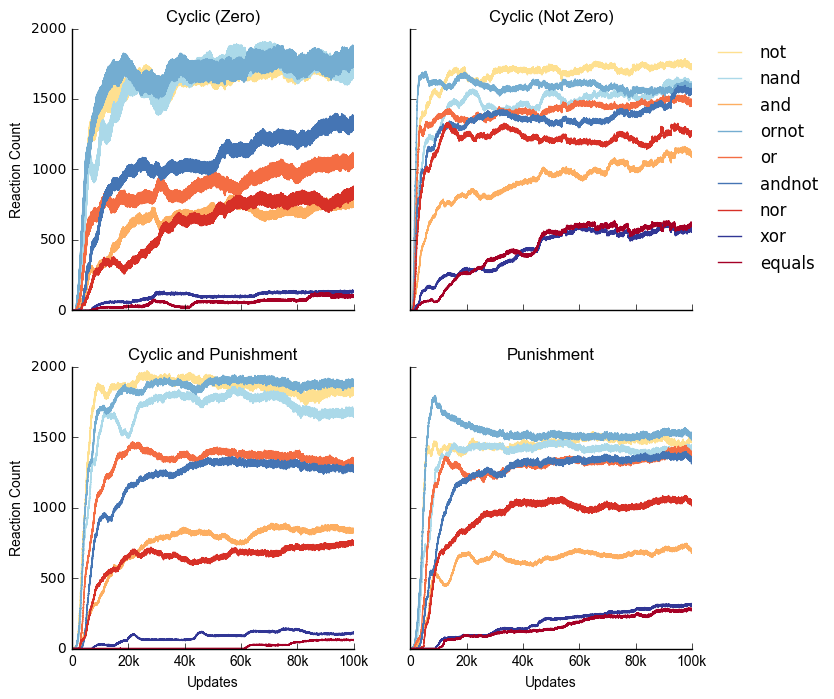

In [14]:
columns = ['update','not','nand','and','ornot','or','andnot','nor','xor','equals','']

dfs = ['reac_not', 'reac_nand', 'reac_and', 'reac_ornot', 'reac_or',
       'reac_andnot', 'reac_nor', 'reac_xor', 'reac_equals']


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row',
                                             figsize=(8,8), facecolor='white')

def clean_axes(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    
hfont = {'fontname':'Arial'}

colors = ['#fee090','#abd9e9','#fdae61','#74add1','#f46d43',
          '#4575b4','#d73027','#313695','#a50026']

##############

for reaction, df, color in zip(columns[1:-1], dfs, colors):
    globals()[df] = merge_reps(path='cyclic_zero_data', file='cur_reactions',
                               columns=columns, col=reaction, skiprows=14)

    ax1.plot(globals()[df]["update"],
             globals()[df].iloc[:,1:].mean(axis=1),
             color=color, label=reaction)
    
ax1.set_ylabel("Reaction Count", **hfont)

clean_axes(ax1)
ax1.set_title('Cyclic (Zero)', **hfont)

##############

for reaction, df, color in zip(columns[1:-1], dfs, colors):
    globals()[df] = merge_reps(path='cyclic_notzero_data', file='cur_reactions',
                               columns=columns, col=reaction, skiprows=14)

    ax2.plot(globals()[df]["update"],
             globals()[df].iloc[:,1:].mean(axis=1),
             color=color, label=reaction)

clean_axes(ax2)
ax2.set_title('Cyclic (Not Zero)', **hfont)
ax2.legend(bbox_to_anchor=(1.5, 1.), frameon=False)

##############

for reaction, df, color in zip(columns[1:-1], dfs, colors):
    globals()[df] = merge_reps(path='cyclic_punish_data', file='cur_reactions',
                               columns=columns, col=reaction, skiprows=14)

    ax3.plot(globals()[df]["update"],
             globals()[df].iloc[:,1:].mean(axis=1),
             color=color, label=reaction)
    
ax3.set_xlabel("Updates", **hfont)
ax3.set_xticklabels(['0','20k','40k','60k','80k','100k'], **hfont)
ax3.set_ylabel("Reaction Count", **hfont)

clean_axes(ax3)
ax3.set_title('Cyclic and Punishment', **hfont)

##############

for reaction, df, color in zip(columns[1:-1], dfs, colors):
    globals()[df] = merge_reps(path='punish_value_data', file='cur_reactions',
                               columns=columns, col=reaction, skiprows=14)

    ax4.plot(globals()[df]["update"],
             globals()[df].iloc[:,1:].mean(axis=1),
             color=color, label=reaction)
    
ax4.set_xlabel("Updates", **hfont)
ax4.set_xticklabels(['0','20k','40k','60k','80k','100k'], **hfont)

clean_axes(ax4)
ax4.set_title('Punishment', **hfont)

#save figure
#fig.savefig('reactions_per_env(n=50).pdf', format='pdf', bbox_inches='tight')

In [ ]:
columns = ['update','day','night','']

df_res = pd.read_csv("../data/cyclic_zero_data/run-1-resource.dat",
                     delimiter=' ', skiprows=8, header=None)
df_res.columns = columns
df_res = df_res.dropna(axis=1)

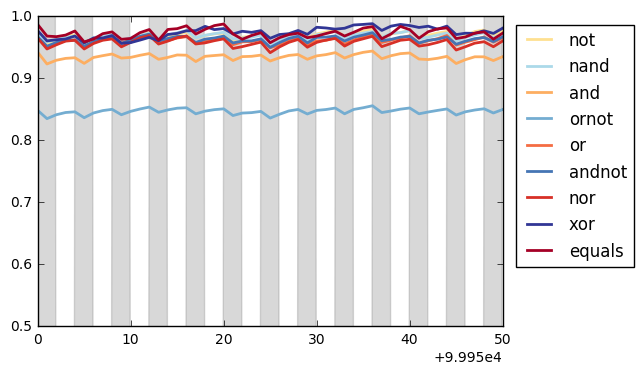

In [15]:
plt.plot(reac_not["update"],
         reac_not.iloc[:,1:].mean(axis=1)/reac_not.iloc[:,1:].mean(axis=1).max(),
         color=colors[0], lw=2, label='not')

plt.plot(reac_nand["update"],
         reac_nand.iloc[:,1:].mean(axis=1)/reac_nand.iloc[:,1:].mean(axis=1).max(),
         color=colors[1], lw=2, label='nand')

plt.plot(reac_and["update"],
         reac_and.iloc[:,1:].mean(axis=1)/reac_and.iloc[:,1:].mean(axis=1).max(),
         color=colors[2], lw=2, label='and')

plt.plot(reac_ornot["update"],
         reac_ornot.iloc[:,1:].mean(axis=1)/reac_ornot.iloc[:,1:].mean(axis=1).max(),
         color=colors[3], lw=2, label='ornot')

plt.plot(reac_or["update"],
         reac_or.iloc[:,1:].mean(axis=1)/reac_or.iloc[:,1:].mean(axis=1).max(),
         color=colors[4], lw=2, label='or')

plt.plot(reac_andnot["update"],
         reac_andnot.iloc[:,1:].mean(axis=1)/reac_andnot.iloc[:,1:].mean(axis=1).max(),
         color=colors[5], lw=2, label='andnot')

plt.plot(reac_nor["update"],
         reac_nor.iloc[:,1:].mean(axis=1)/reac_nor.iloc[:,1:].mean(axis=1).max(),
         color=colors[6], lw=2, label='nor')

plt.plot(reac_xor["update"],
         reac_xor.iloc[:,1:].mean(axis=1)/reac_xor.iloc[:,1:].mean(axis=1).max(),
         color=colors[7], lw=2, label='xor')

plt.plot(reac_equals["update"],
         reac_equals.iloc[:,1:].mean(axis=1)/reac_equals.iloc[:,1:].mean(axis=1).max(),
         color=colors[8], lw=2, label='equals')

night = list(np.append(np.zeros(20), np.ones(20)))*25000

plt.fill_between(np.arange(0,len(night)/10,0.1), 0, night, color='grey', alpha=0.3)
#plt.step(df_res['update'], df_res['night']/10, color='grey', label='night')

plt.xlim(99950,100000)
plt.ylim(0.5,1)

plt.legend(bbox_to_anchor=(1.3,1));

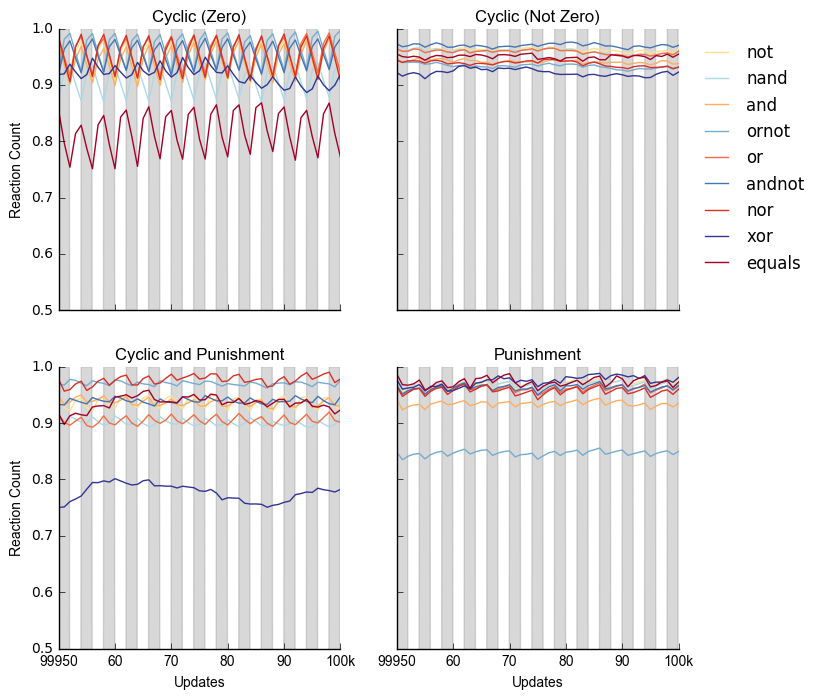

In [18]:
columns = ['update','not','nand','and','ornot','or','andnot','nor','xor','equals','']

dfs = ['reac_not', 'reac_nand', 'reac_and', 'reac_ornot', 'reac_or',
       'reac_andnot', 'reac_nor', 'reac_xor', 'reac_equals']


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row',
                                             figsize=(8,8), facecolor='white')

def clean_axes(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    
hfont = {'fontname':'Arial'}

colors = ['#fee090','#abd9e9','#fdae61','#74add1','#f46d43',
          '#4575b4','#d73027','#313695','#a50026']

night = list(np.append(np.zeros(20), np.ones(20)))*25000

##############

for reaction, df, color in zip(columns[1:-1], dfs, colors):
    globals()[df] = merge_reps(path='cyclic_zero_data', file='cur_reactions',
                               columns=columns, col=reaction, skiprows=14)

    ax1.plot(globals()[df]["update"],
             globals()[df].iloc[:,1:].mean(axis=1)/globals()[df].iloc[:,1:].mean(axis=1).max(),
             color=color, label=reaction)
    
ax1.fill_between(np.arange(0,len(night)/10,0.1), 0, night, color='grey', alpha=0.3)
ax1.set_ylabel("Reaction Count", **hfont)
ax1.set_xlim(99950,100000)
ax1.set_ylim(0.5,1)

clean_axes(ax1)
ax1.set_title('Cyclic (Zero)', **hfont)

##############

for reaction, df, color in zip(columns[1:-1], dfs, colors):
    globals()[df] = merge_reps(path='cyclic_notzero_data', file='cur_reactions',
                               columns=columns, col=reaction, skiprows=14)

    ax2.plot(globals()[df]["update"],
             globals()[df].iloc[:,1:].mean(axis=1)/globals()[df].iloc[:,1:].mean(axis=1).max(),
             color=color, label=reaction)
    
ax2.fill_between(np.arange(0,len(night)/10,0.1), 0, night, color='grey', alpha=0.3)
ax2.set_xlim(99950,100000)
ax2.set_ylim(0.5,1)

clean_axes(ax2)
ax2.set_title('Cyclic (Not Zero)', **hfont)
ax2.legend(bbox_to_anchor=(1.5, 1.), frameon=False)

##############

for reaction, df, color in zip(columns[1:-1], dfs, colors):
    globals()[df] = merge_reps(path='cyclic_punish_data', file='cur_reactions',
                               columns=columns, col=reaction, skiprows=14)

    ax3.plot(globals()[df]["update"],
             globals()[df].iloc[:,1:].mean(axis=1)/globals()[df].iloc[:,1:].mean(axis=1).max(),
             color=color, label=reaction)
    
ax3.fill_between(np.arange(0,len(night)/10,0.1), 0, night, color='grey', alpha=0.3)
ax3.set_xlabel("Updates", **hfont)
ax3.set_xticklabels(['99950','60','70','80','90','100k'], **hfont)
ax3.set_ylabel("Reaction Count", **hfont)
ax3.set_xlim(99950,100000)
ax3.set_ylim(0.5,1)

clean_axes(ax3)
ax3.set_title('Cyclic and Punishment', **hfont)

##############

for reaction, df, color in zip(columns[1:-1], dfs, colors):
    globals()[df] = merge_reps(path='punish_value_data', file='cur_reactions',
                               columns=columns, col=reaction, skiprows=14)

    ax4.plot(globals()[df]["update"],
             globals()[df].iloc[:,1:].mean(axis=1)/globals()[df].iloc[:,1:].mean(axis=1).max(),
             color=color, label=reaction)
    
ax4.fill_between(np.arange(0,len(night)/10,0.1), 0, night, color='grey', alpha=0.3) 
ax4.set_xlabel("Updates", **hfont)
ax4.set_xticklabels(['99950','60','70','80','90','100k'], **hfont)
ax4.set_xlim(99950,100000)
ax4.set_ylim(0.5,1)

clean_axes(ax4)
ax4.set_title('Punishment', **hfont)

#save figure
#fig.savefig('reactions_per_env(n=50)_last50u.pdf', format='pdf', bbox_inches='tight')